In [12]:
import cv2 
import sys
import os
import numpy as np
from tifffile import imread, imsave
path_read = sys.path[0] # both images
Original = cv2.imread(path_read + r'\\Max_exposure_data9' + '.tif')
Edited = cv2.imread(path_read + r'\\Network9' + '.tif')
Original = imread(path_read + r'\\Max_exposure_data9' + '.tif')
Edited = imread(path_read + r'\\Network9' + '.tif')
print(Original.shape)
print(Edited.shape)
diff = cv2.subtract(Original[0,:,:], Edited[0,:,:])

#cv2.imwrite("c:\\diff.jpg", diff)

(100, 512, 1024)
(100, 512, 1024)


error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\core\src\arithm.cpp:693: error: (-5:Bad argument) When the input arrays in add/subtract/multiply/divide functions have different types, the output array type must be explicitly specified in function 'cv::arithm_op'


0.0
255.0


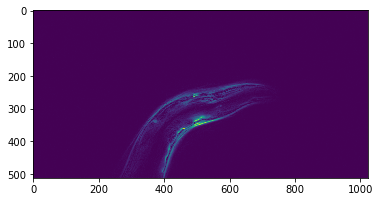

In [77]:
import numpy as np
import scipy
from scipy import ndimage
import scipy.misc
from tifffile import imread, imsave
from matplotlib.pyplot import imshow
%matplotlib inline

im = imread('Max_exposure_data9.tif')
im = im.astype('int16')
dx = ndimage.sobel(im, 1)  # horizontal derivative
dy = ndimage.sobel(im, 0)  # vertical derivative
mag = numpy.hypot(dx, dy)  # magnitude
mag *= 255.0 / numpy.max(mag)  # normalize (Q&D)
Max = mag
imsave('Max_exposure_data9_sobel.tif', mag)
imshow(mag[0,:,:])
print(np.amin(mag))
print(np.amax(mag))

0.0
255.0


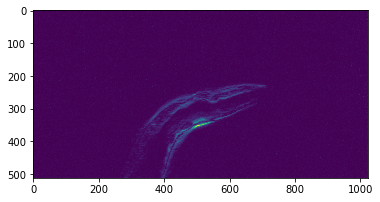

In [9]:
import numpy as np
import scipy
from scipy import ndimage
import scipy.misc
from tifffile import imread, imsave
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

im = imread('Network9.tif')
im = im.astype('int16')
dx = ndimage.sobel(im, 1)  # horizontal derivative
dy = ndimage.sobel(im, 0)  # vertical derivative
mag = numpy.hypot(dx, dy)  # magnitude
mag *= 255.0 / numpy.max(mag)  # normalize (Q&D)
Net = mag
imsave('Network9_sobel.tif', mag)
imshow(mag[0,:,:])
print(np.amin(mag))
print(np.amax(mag))

In [75]:
from skimage.metrics import structural_similarity as ssim
m = np.sum((Max[0,:,:].astype("float") - Max[0,:,:].astype("float"))**2)
m /= Net.shape[1]*Net.shape[2]

s = ssim(Max[0,:,:],Max[0,:,:])


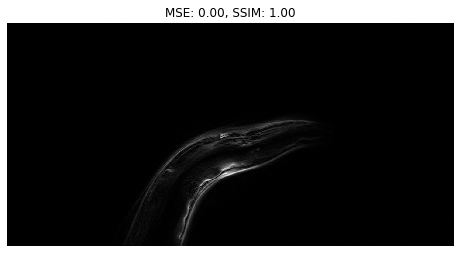

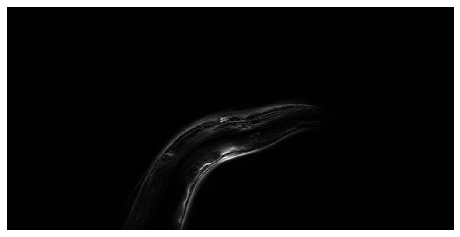

In [76]:
import matplotlib.pyplot as plt
#from matplotlib.pyplot import imshow,imsave

# setup the figure
#fig = plt.figure("Max exposure vs Network Prediction")
plt.figure(figsize=(8, 6))
#plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

#ax = fig.add_subplot(1, 2, 1)
plt.imshow(Max[0,:,:], cmap = plt.cm.gray)
plt.title("MSE: %.2f, SSIM: %.2f" % (m, s))
plt.axis("off")
plt.show()
plt.figure(figsize=(8, 6))
#ax = fig.add_subplot(1, 2, 2)
plt.imshow(Max[0,:,:], cmap = plt.cm.gray)
plt.axis("off")
# show the images
plt.show()

9795
173.3426966292135
255.0
8.565084226646247
255.0


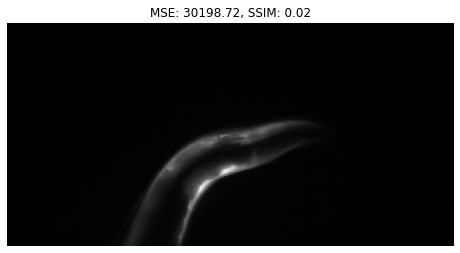

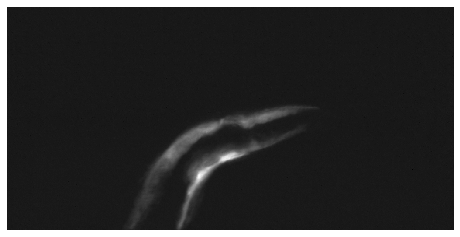

In [98]:
Max = imread('Max_exposure_data9.tif')
Net = imread('Network9.tif')
Max = Max.astype('int16')
Net = Net.astype('int16')
print(numpy.max(Max))
Net = Net * 255.0 / numpy.max(Net)  # normalize (Q&D)
Max = Max * 255.0 / numpy.max(Max)  # normalize (Q&D)
m = np.sum((Max[0,:,:].astype("float") - Net[0,:,:].astype("float"))**2)
m /= Net.shape[1]*Net.shape[2]
s = ssim(Max[0,:,:],Net[0,:,:])
print(np.amin(Net))
print(np.amax(Net))
print(np.amin(Max))
print(np.amax(Max))
plt.figure(figsize=(8, 6))
#plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

#ax = fig.add_subplot(1, 2, 1)
plt.imshow(Max[0,:,:], cmap = plt.cm.gray)
plt.title("MSE: %.2f, SSIM: %.2f" % (m, s))
plt.axis("off")
plt.show()
plt.figure(figsize=(8, 6))
#ax = fig.add_subplot(1, 2, 2)
plt.imshow(Net[0,:,:], cmap = plt.cm.gray)
plt.axis("off")
# show the images
plt.show()

In [99]:
GT = imread("Max_exposure_data9.tif")
Predicted = imread("Network9.tif")


In [101]:
import matplotlib.pyplot as plt

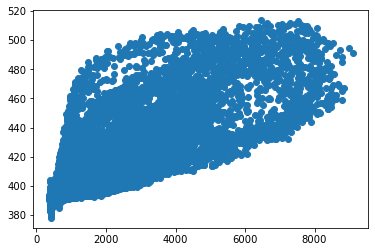

In [103]:
plt.scatter(GT[0,:,:].flatten(), Predicted[0,:,:].flatten())

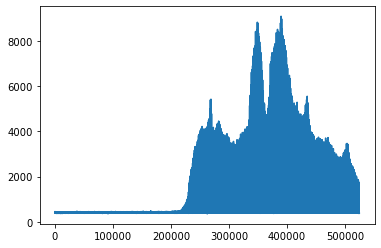

In [105]:
plt.plot(GT[0,:,:].flatten())

In [109]:

import scipy.stats as sc

sc.pearsonr(GT[0,:,:].flatten(), Predicted[0,:,:].flatten())


(0.8989517013386984, 0.0)